# Context - Common

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
from darts.datasets import EnergyDataset

In [3]:
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


---

## Load data

In [4]:
ts = EnergyDataset().load()

## Process the data

In [5]:
df = ts.pd_dataframe()
df = df.interpolate()
cols = ['generation biomass', 'generation solar', 'generation nuclear']
df = df[cols]

In [6]:
ts = on.TimeSeries.from_dataframe(df)

In [7]:
ts_uni = ts['generation solar'].slice(pd.Timestamp('2015'), pd.Timestamp('2016'))
ts_multi = ts.slice(pd.Timestamp('2015'), pd.Timestamp('2016'))

In [8]:
train, test = ts_uni.split_after(pd.Timestamp('2015-09-01'))

---

## Common Context

In [9]:
from ontime.context import common

### Profiler

In [10]:
profiler = common.Profiler()

#### Daily Aggregation

In [11]:
day_mean = profiler.profile(ts_uni, profiler.Period.DAILY, profiler.Aggregation.MEAN)
day_median = profiler.profile(ts_uni, profiler.Period.DAILY, profiler.Aggregation.MEDIAN)

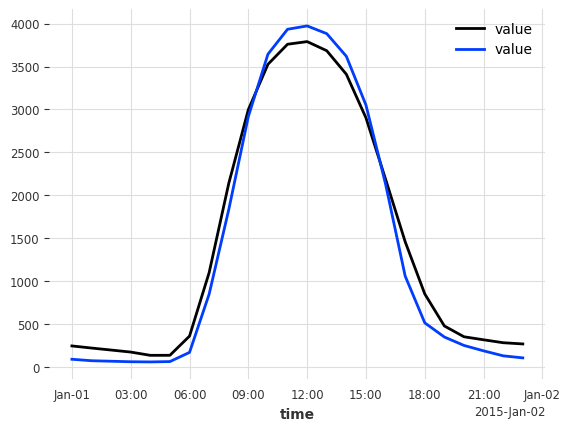

In [12]:
day_mean.plot();
day_median.plot();

#### Weekly Aggregation

In [13]:
week_mean = profiler.profile(ts_uni, profiler.Period.WEEKLY, profiler.Aggregation.MEAN)
week_median = profiler.profile(ts_uni, profiler.Period.WEEKLY, profiler.Aggregation.MEDIAN)

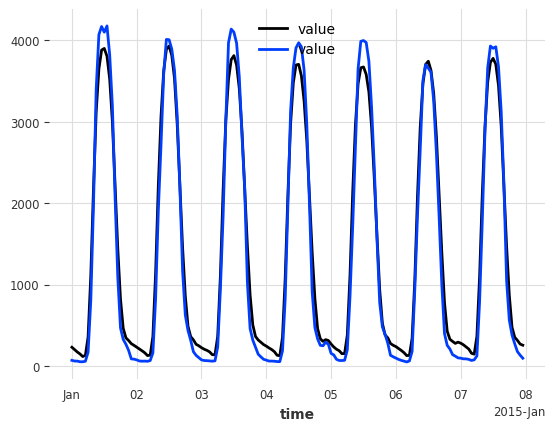

In [14]:
week_mean.plot();
week_median.plot();

### Generic Predictor

In [15]:
model = common.GenericPredictor()

In [16]:
model.fit(train)

What does the future looks like ?

In [17]:
pred = model.predict(48)

In [18]:
on.plots.prediction(train[-96:], pred, test[:48])

alt.Chart(...)

### Generic Detector

In [19]:
model = common.GenericDetector()

In [20]:
model.fit(train)

Does the current signal has problem ? 

In [21]:
detected_test = model.detect(test)

In [22]:
on.plots.anomalies(test[:72], detected_test[:72])

alt.LayerChart(...)

What if we want to have an idea about the future problems ?

In [23]:
predetected = model.predetect(72)

In [24]:
on.plots.anomalies(test[:72], predetected[:72])

alt.LayerChart(...)